# Assignment 5

## 1. Choose a REGRESSION dataset (reusing bikeshare is allowed), perform a test/train split, and build a regression model (just like in assignment 3), and calculate the 
    + Training Error (MSE, MAE)
    + Testing Error (MSE, MAE)
## 2. Choose a CLASSIFICATION dataset (not the adult.data set, The UCI repository has many datasets as well as Kaggle), perform test/train split and create a classification model (your choice but DecisionTree is fine). Calculate 
    + Accuracy
    + Confusion Matrix
    + Classifcation Report
    
## 3. (Bonus) See if you can improve the classification model's performance with any tricks you can think of (modify features, remove features, polynomial features)

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 6)
plt.rcParams['font.size'] = 14
import pandas as pd
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [153]:
day_hour_count = pd.read_csv("/Users/meganrahrig/Desktop/JHU/Machine Learning - SummerQ24/Mod 5/bikeshare_hour_count.csv")
#day_hour_count

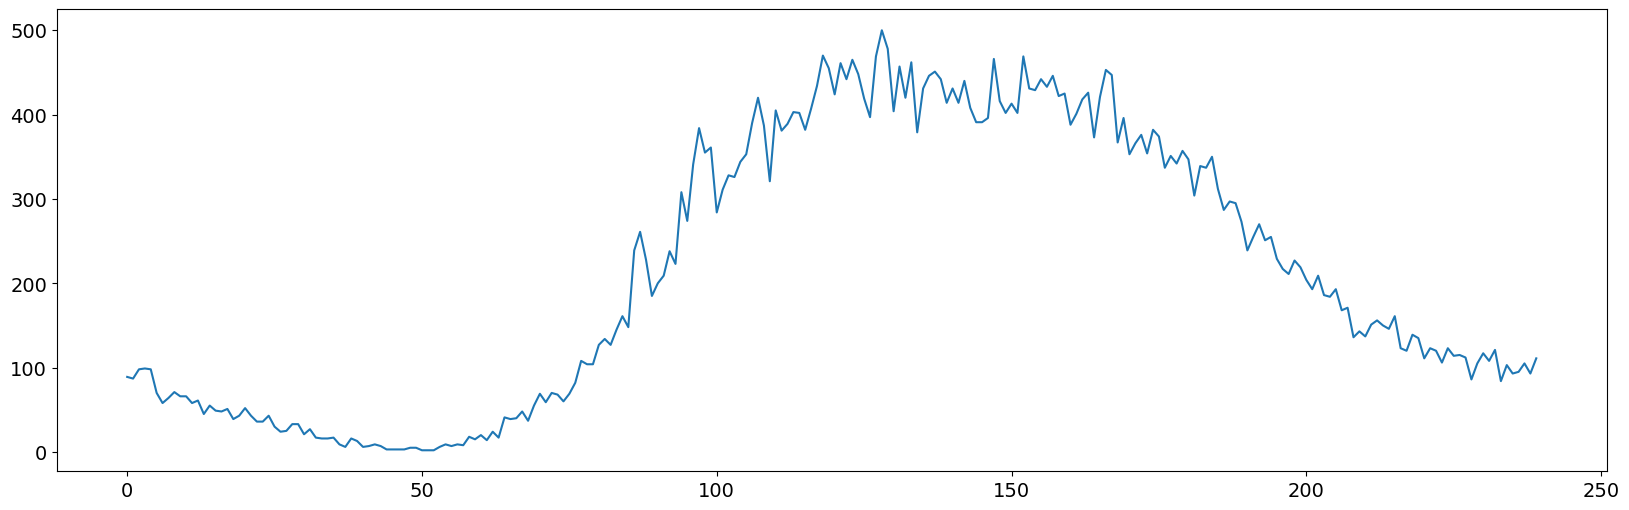

In [154]:
plt.plot(day_hour_count.index, day_hour_count["saturday"])

In [155]:
saturday = day_hour_count[["hour","saturday"]].copy()

In [156]:
x = saturday['hour'].values.reshape(-1, 1)
y = saturday['saturday'].values

In [157]:
model=LinearRegression()
model.fit(x,y)
model.coef_,model.intercept_

(array([10.13721158]), 91.97282157676362)

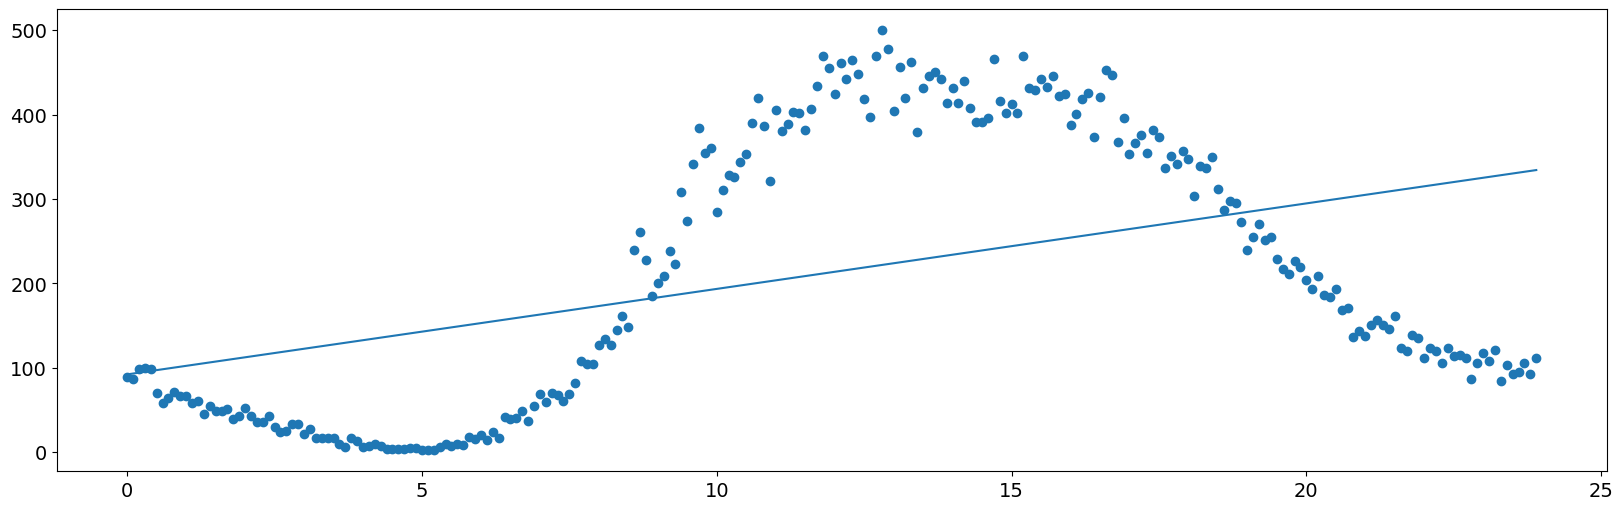

In [158]:
plt.scatter(x,y)
plt.plot(x, np.dot(x, model.coef_)+model.intercept_)


In [159]:
model=LinearRegression()
model.fit(x[:125],y[:125])
model.coef_, model.intercept_

(array([34.24589862]), -71.80457142857142)

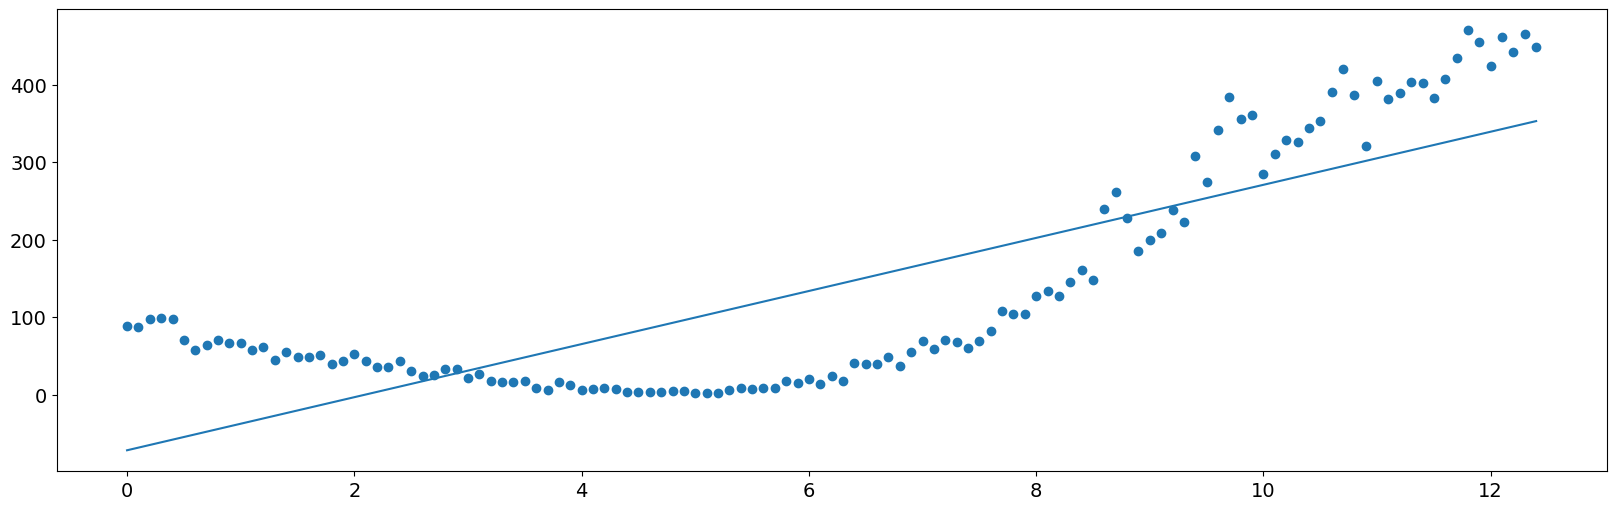

In [160]:
plt.scatter(x[:125],y[:125])
plt.plot(x[:125], np.dot(x[:125], model.coef_)+model.intercept_)

In [161]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.5)

In [162]:
model=LinearRegression()
model.fit(x_train,y_train)
model.coef_, model.intercept_

(array([12.51628042]), 80.01743345526233)

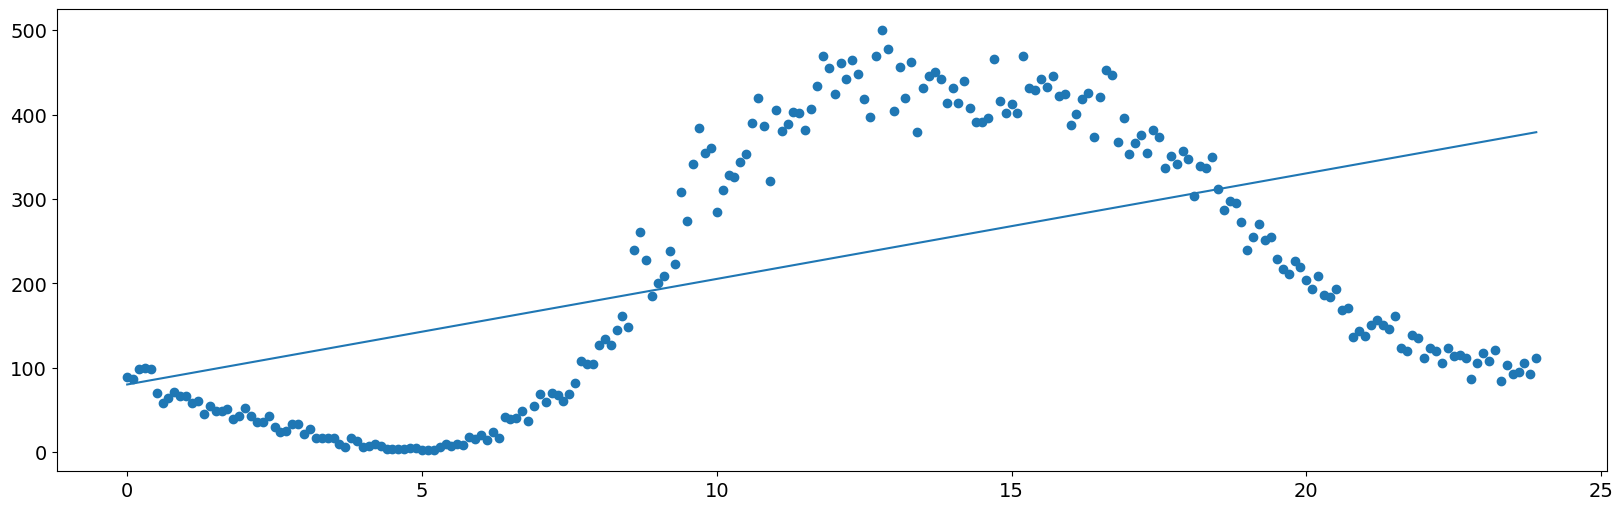

In [163]:
plt.scatter(x,y)
plt.plot(x, np.dot(x, model.coef_)+model.intercept_)


In [164]:
mean_squared_error(y_test, np.dot(x_test,model.coef_)+model.intercept_)

22112.870540853753

In [165]:
mean_squared_error(y_train, np.dot(x_train,model.coef_)+model.intercept_)

20870.544938251165

In [166]:
mean_absolute_error(y_test, np.dot(x_test,model.coef_)+model.intercept_)

132.6968893635133

In [167]:
mean_absolute_error(y_train, np.dot(x_train,model.coef_)+model.intercept_)

124.43654084742575

Training Error (MSE, MAE)
- (20870.54, 124.43)
  
Testing Error (MSE, MAE)
- (22112.87, 132.69)

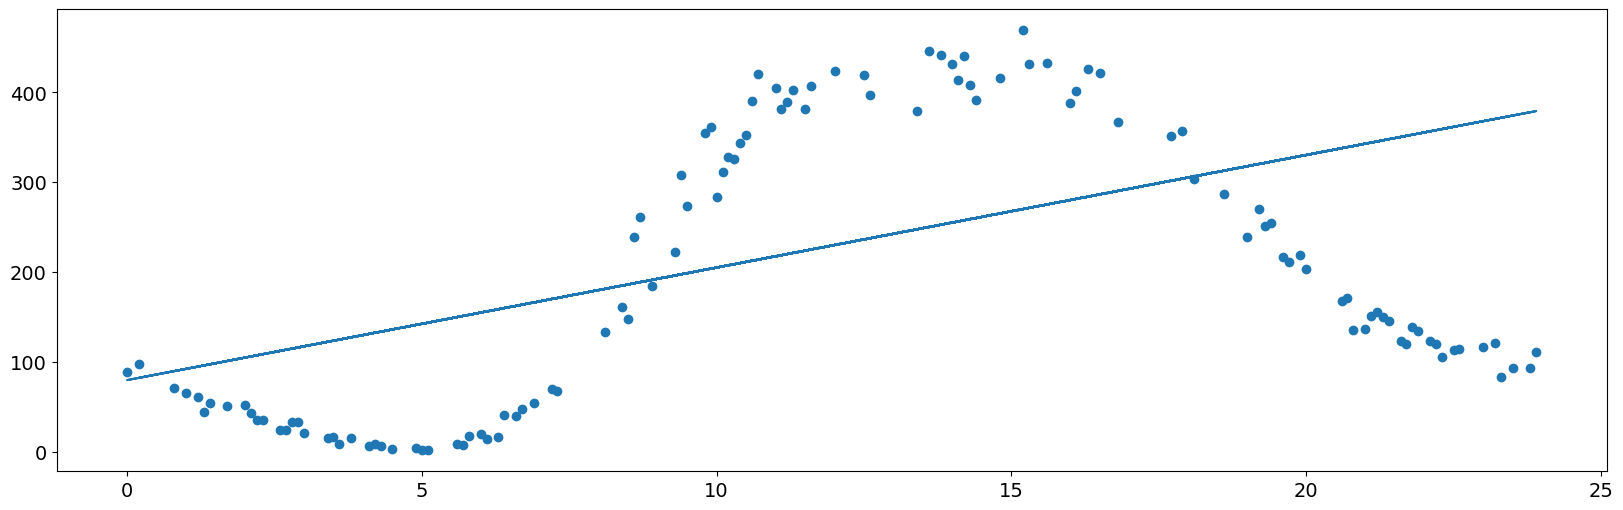

In [168]:
plt.scatter(x_test,y_test)
plt.plot(x_test,np.dot(x_test,model.coef_)+model.intercept_)

Model fit
- This is not a good model fit because, as we observed in module 4, BikeShare hour data works best with a polynomial regression. However, we can observe that the errors for the training model are smaller MSE and MAE compared to the testing model. So, while the errors are very large, indicating a poor fit, the training model is slightly better than the testing model. 

In [169]:
# from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import RandomForestClassifier as Model
# model = Model()
from sklearn.model_selection import train_test_split

from sklearn.metrics import (accuracy_score, 
                             classification_report, 
                             confusion_matrix, auc, roc_curve
                            )
import numpy as np

In [170]:
obesity = pd.read_csv("/Users/meganrahrig/Desktop/JHU/Machine Learning - SummerQ24/Mod 5/ObesityDataSet_raw_and_data_sinthetic.csv")
#print(obesity)

In [171]:
mapping = {'Insufficient_Weight':0, 'Normal_Weight': 1, 'Overweight_Level_I': 2, 'Overweight_Level_II': 3, 'Obesity_Type_I':4,'Obesity_Type_II':5,'Obesity_Type_III':6}
obesity['NObeyesdad'] = obesity['NObeyesdad'].map(mapping)

mapping3 = {'Male':0, 'Female': 1}
obesity['Gender'] = obesity['Gender'].map(mapping3)

mapping4 = {'no':0, 'yes': 1}
obesity['FAVC'] = obesity['FAVC'].map(mapping4)

mapping5 = {'no':0, 'yes': 1}
obesity['SCC'] = obesity['SCC'].map(mapping5)

mapping6 = {'no':0, 'yes': 1}
obesity['SMOKE'] = obesity['SMOKE'].map(mapping6)

mapping7 = {'no':0, 'yes': 1}
obesity['family_history_with_overweight'] = obesity['family_history_with_overweight'].map(mapping7)

obesity = obesity.copy().drop('MTRANS', axis=1)
obesity = obesity.copy().drop('CAEC', axis=1)
obesity = obesity.copy().drop('CALC', axis=1)


In [172]:
model_class = DecisionTreeClassifier(criterion='entropy')
model_class.fit(obesity.drop(['NObeyesdad'], axis=1), obesity.NObeyesdad)

DecisionTreeClassifier(criterion='entropy')

In [173]:
list(zip(obesity.drop(['NObeyesdad'], axis=1).columns, model_class.feature_importances_))

[('Age', 0.019352697451213343),
 ('Gender', 0.11884000125204451),
 ('Height', 0.19242055459250157),
 ('Weight', 0.6306507465597302),
 ('FAVC', 0.011000591537399405),
 ('FCVC', 0.0016924565354306557),
 ('NCP', 0.007215365828293219),
 ('SCC', 0.0),
 ('SMOKE', 0.0),
 ('CH2O', 0.011298139170988823),
 ('family_history_with_overweight', 0.001702884502963928),
 ('FAF', 0.00527805182709551),
 ('TUE', 0.0005485107423387062)]

- Weight is a strong predictor of obesity

In [174]:
obesity.drop(['NObeyesdad'] , axis=1).head()

,Age,Gender,Height,Weight,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE
0,21.0,1,1.62,64.0,0,2.0,3.0,0,0,2.0,1,0.0,1.0
1,21.0,1,1.52,56.0,0,3.0,3.0,1,1,3.0,1,3.0,0.0
2,23.0,0,1.80,77.0,0,2.0,3.0,0,0,2.0,1,2.0,1.0
3,27.0,0,1.80,87.0,0,3.0,3.0,0,0,2.0,0,2.0,0.0
4,22.0,0,1.78,89.8,0,2.0,1.0,0,0,2.0,0,0.0,0.0


In [175]:
ox_train, ox_test, oy_train, oy_test = train_test_split(obesity.drop(['NObeyesdad'], axis=1),obesity.NObeyesdad, test_size=.20)

In [176]:
obesity.shape,  ox_train.shape, ox_test.shape

((2111, 14), (1688, 13), (423, 13))

In [177]:
model_class.fit(ox_train, oy_train)

DecisionTreeClassifier(criterion='entropy')

In [178]:
obesity.NObeyesdad.value_counts()

NObeyesdad
4    351
6    324
5    297
2    290
3    290
1    287
0    272
Name: count, dtype: int64

In [179]:
predictions = np.zeros(2111)

In [180]:
test_predictions = model_class.predict(ox_test)

In [181]:
accuracy_score(oy_test, test_predictions)

0.9408983451536643

Accuracy
- The model produced an accuracy score of 94.1%


In [182]:
confusion_matrix(oy_test, test_predictions)

array([[55,  0,  0,  0,  0,  0,  0],
       [ 1, 45,  4,  0,  0,  0,  0],
       [ 0,  4, 56,  1,  0,  0,  0],
       [ 0,  0,  6, 51,  2,  0,  0],
       [ 0,  0,  0,  2, 68,  3,  0],
       [ 0,  0,  0,  0,  2, 59,  0],
       [ 0,  0,  0,  0,  0,  0, 64]])

Confusion matrix
- The model predicted the weight ratings pretty well, with few individuals being categorized incorrectly

In [183]:
print(classification_report(oy_test, test_predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        55
           1       0.92      0.90      0.91        50
           2       0.85      0.92      0.88        61
           3       0.94      0.86      0.90        59
           4       0.94      0.93      0.94        73
           5       0.95      0.97      0.96        61
           6       1.00      1.00      1.00        64

    accuracy                           0.94       423
   macro avg       0.94      0.94      0.94       423
weighted avg       0.94      0.94      0.94       423



Classification
- Precision for each weight classification is pretty high, with the lowest precision being 85%. Recall scores are also quite high, resulting in high f1 scores that land between those two figures. The classification report suggests that this is a very good model fit.
- For this reason, I'd stick with a linear regression model.